<a href="https://colab.research.google.com/github/AKB-21/google-cloud-4-words/blob/master/Bank_Churn_Full_code_BK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [ ]:
# making sure warnings are not displayed in the console

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing necessary libraries

In [ ]:
# connecting Google Drive account to Colab notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
# connecting Google Drive account to Colab notebook

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import csv into dataframe
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['Churn.csv']))
# copying data to another varaible to preserve original data
df_data= data.copy()

## Data Overview

In [ ]:
# check sample of the data

df_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_data.shape

(10000, 14)

####Observation:
There are ten thousand rows and 14 columns

In [ ]:
# detailed information on each column of the dataset

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


####Observation:
* There are no null data for any attribute in the dataset

In [ ]:
# Statistical description of the dataset
df_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Exploratory Data Analysis

In [ ]:
# data type of each columns feature variable

df_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

####Observation
All the columns except Surname, Geography, and Gender are of numerical data types.

# __2. Data Preprocessing__

## 2.1. Deleting Unnecessary Information

The columns ___RowNumber___, ___CustomerId___, and ___Surname___ are related to personal data of the customers. These columns do not have any quantitative impact on any calculations whatsoever. Hence, we can avoid these extra columns of information by removing them from the data.

In [ ]:
# sample of data before deleting the unnecessary columns

df_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
# deleting the unnecessary columns (RowNumber, CustomerId, Surname)

df_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
# sample of data after deleting the unnecessary columns

df_data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## 2.2. Dealing with NULL or missing data

Often, we may find missing data or NULL data in certain columns of a dataframe or dataset. Such NULL data values not only pose problems in the analysis, but also terminate any mathematical calculations that are carried out on the dataset without dealing with them. Therefore, we need to make sure that there are no such data cells in our dataset.

In [ ]:
# We can check if the pandas dataframe 'data' has any null values in each of its column using the isnull() function.
# Furthermore, the sum() function tells us the total null values in each column.

df_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

####Observation
* There are no NULL or missing values in this data. We can proceed with analysis and no data update / cleanup is required

# __3. Exploratory Data Analysis__

Now that we have preprocessed the data by removing unnecessary information from it, we can start an exploratory analysis to find possible correlations between different features (columns) of the data and resulting outcomes (possibly one data column). We will analyze each and every possible column in the data to measure its eligibility to be a valuable feature for the exit criteria of any customer.



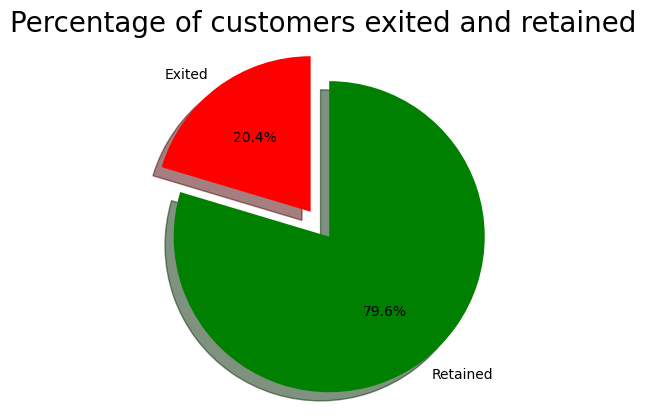

In [ ]:
# Pie chart to display the amount (percentage) of customers churned and the ones retained

labels = ['Exited', 'Retained']
sizes = [df_data.Exited[df_data['Exited'] == 1].count(), df_data.Exited[df_data['Exited'] == 0].count()]
explode = [0.1, 0]

# create and plot the pie chart

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, radius=0.5, colors=['r', 'g'], )
plt.title("Percentage of customers exited and retained", size = 20)
plt.axis('equal')
plt.show()


####Observation
From the given data, it is visible that around 20% of the people have exited or churned. So, we can try to create a machine learning model that can predict whether a customer will exit the bank or not given his/her banking data.

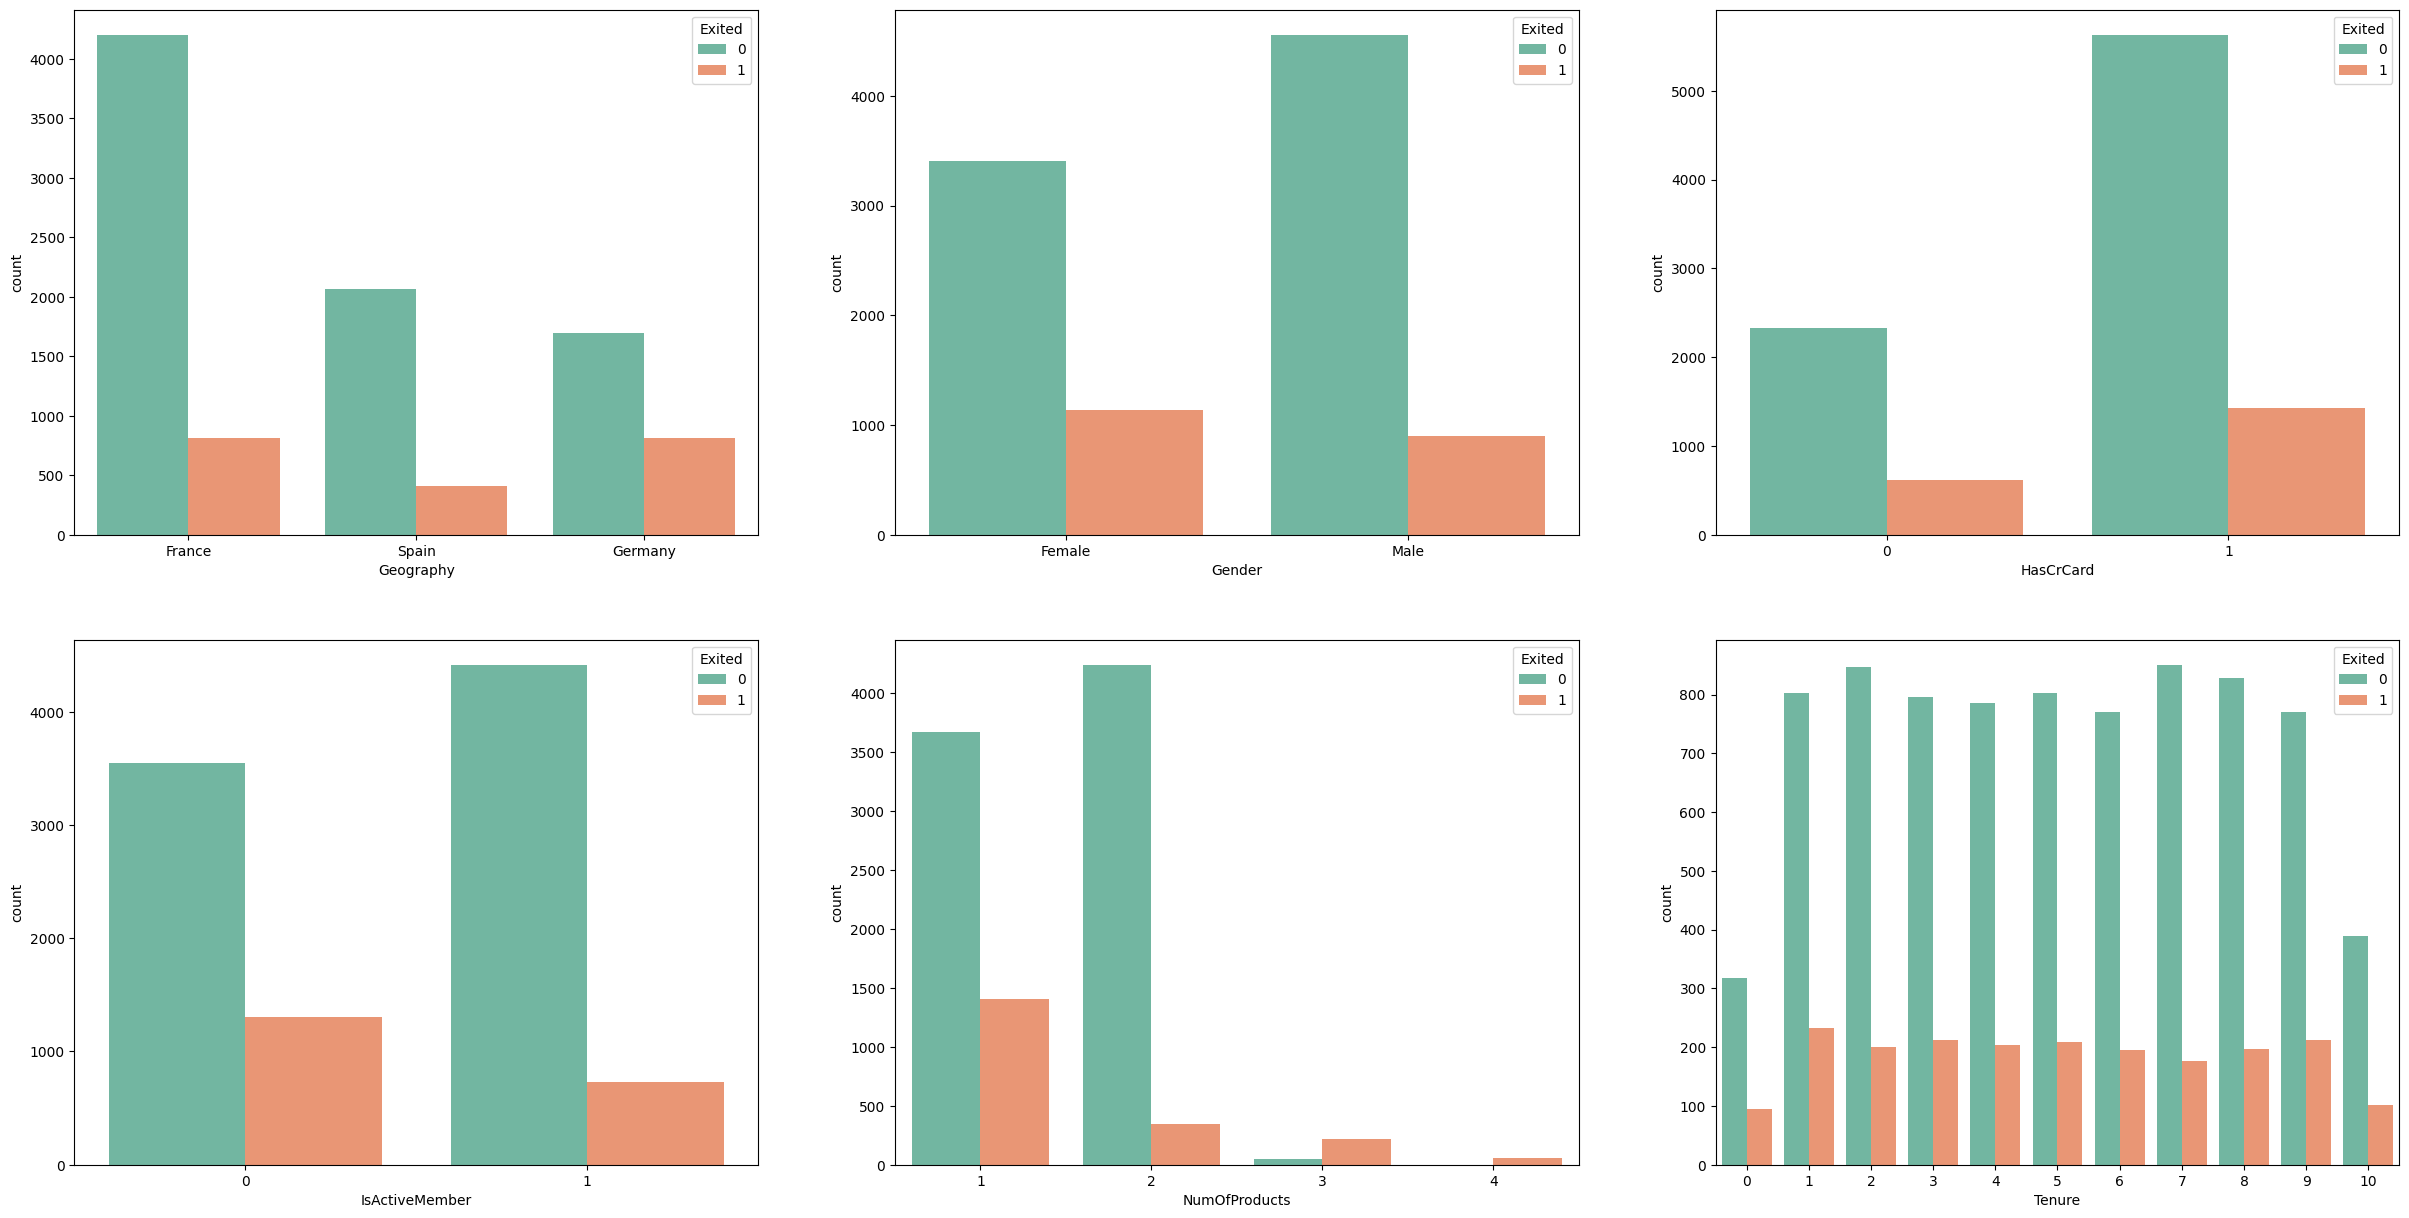

In [ ]:
# Count column plots to map the dependence of 'Exited' column on categorical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Geography', hue='Exited', data=df_data, palette='Set2', ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=df_data, palette='Set2', ax=ax[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df_data, palette='Set2', ax=ax[0][2])
sns.countplot(x='IsActiveMember', hue='Exited', data=df_data, palette='Set2', ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df_data, palette='Set2', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited', data=df_data, palette='Set2', ax=ax[1][2])

plt.show()

### __<font color='green'>Observations</font>__

* __Geography:__ We can see that majority of the data is about people France. Ideally for an evenly-distributed data, if the amount of people from a place is the majority, then the majority of churning should also be within that group. However, it is not so in this case as we see that number of exited people who belong to Germany is almost equal to the number of exits from France.
* __Gender:__ We can clearly see the __Female customers__ had more exits than the male customers.
* __Credit cards:__ It is generally expected that people who have more interactions and products of the bank, would likely be retained for a longer time. However, we can see that people who have credit cards have more exits than those who do not own credit cards.
* __Active Member:__ This is an expected observation. We can see that inactive members have been churned more than members who are active.
* __Number of Products:__ This is also an expected observation, where we see that customers who own more products from the bank are likely to be retained for a longer time than those who own less products.
* __Tenure:__ We see that the tenure of a customer does not really tell us much if that customer is likely to be churned or not. Initially, it looks like new joinees and older people (10 years) have been churned less. However, on a closer analysis we can see that the overall number of retained customer are significantly less in both these cases. As a result, we can probably conclude that new joinees and older customers may be more likely to be churned as their churn rate (percentage) is likely to be higher than other tenure rates.

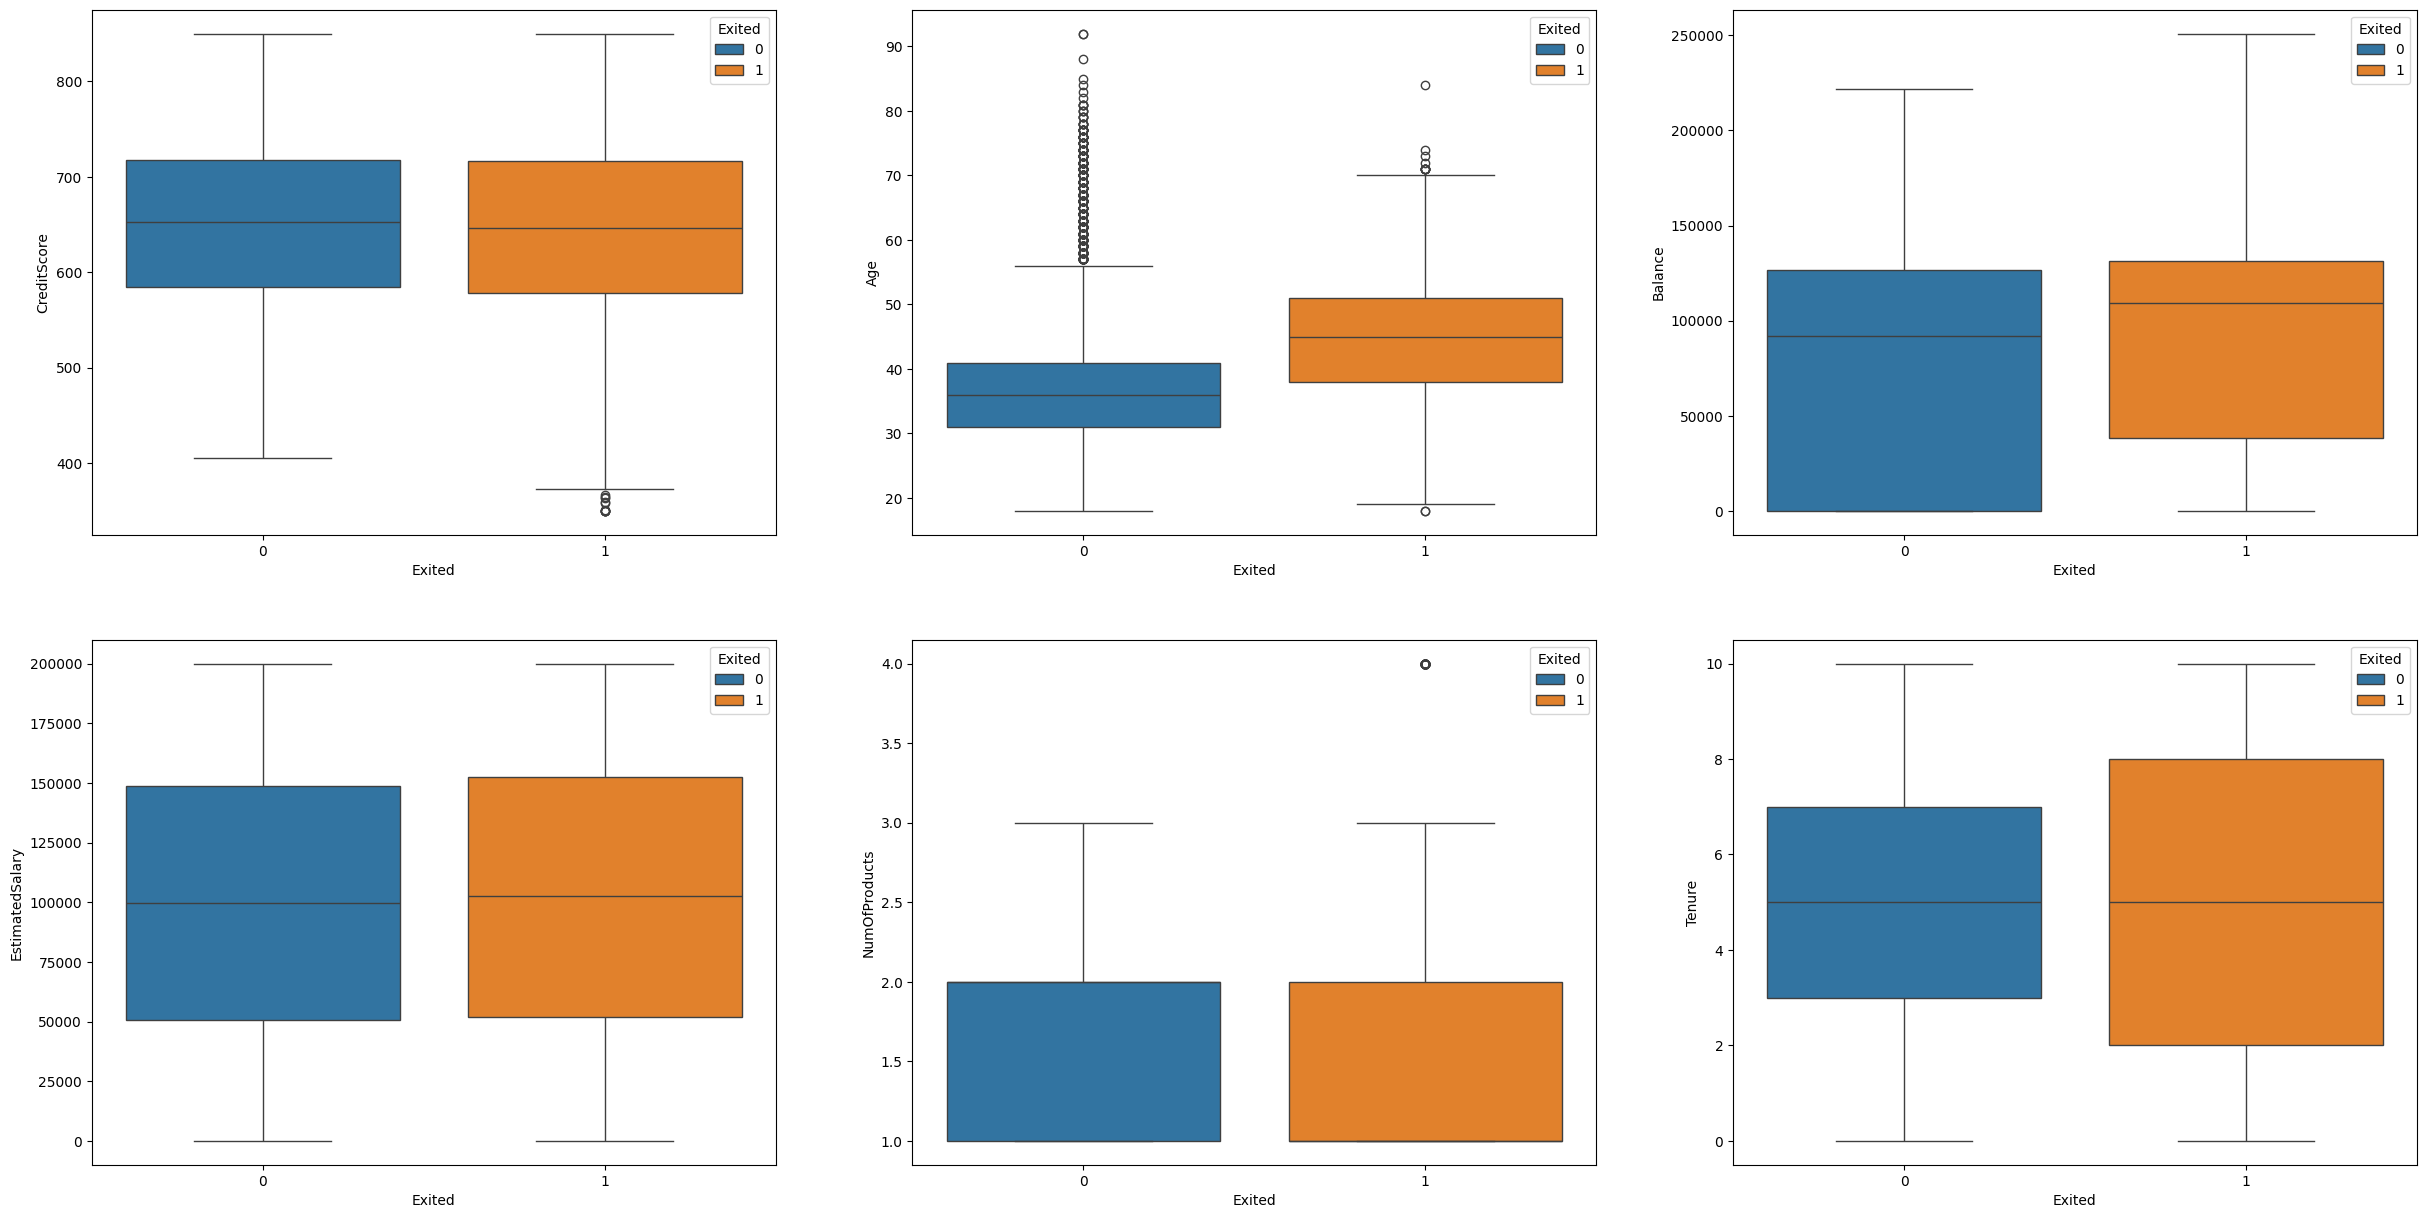

In [ ]:
# Count column plots to map the dependence of 'Exited' column on continuous and numerical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=df_data, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=df_data, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=df_data, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=df_data, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=df_data, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=df_data, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

plt.show()

### __<font color='green'>Observations</font>__

* __Credit Score:__ We can see that Credit Score does not have much effect on the customer churn.
* __Age:__ Here we can see that the older customers are more likely to be churned from the bank. This is most probably to keep a younger manpower in the organization.
* __Balance:__ When it comes to Balance, we see that the bank is losing a significant number of customers with high balance in their accounts. This is likely to affect the bank's capital as well.
* __Estimated Salary:__ Estimated Salary does not seem to affect the customer churn much.
* __Number of Products:__ We see that the number of products also does not seem to affect the customer churn.
* __Tenure:__ For tenure, as we can see here too, customer belonging more to the two extreme tenure groups (new joinees and older ones) are more likely to be churned.

# __4. Data Preparation__

We first create a training data set with the categorical variables and continuous variables. We also include the 'Exited' target variable in the data.

In [ ]:
# list of continuous and categorical variables/features

continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
categorical_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

# separating the train and test data using a 80%-20% split

data_train = df_data.sample(frac=0.8, random_state=100)
data_test = df_data.drop(data_train.index)

# check the number of rows in each data set for verification

print('Number of rows in train data: ', len(data_train))
print('Number of rows in test data: ', len(data_test))

print()

data_train = data_train[['Exited'] + continuous_vars + categorical_vars]
data_train.head()

Number of rows in train data:  8000
Number of rows in test data:  2000



,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
8018,1,632,23,3,122478.51,1,147230.77,1,0,Germany,Male
9225,0,594,32,4,120074.97,2,162961.79,1,1,Germany,Female
3854,0,687,33,9,135962.40,2,121747.96,1,0,Germany,Male
2029,0,520,33,4,156297.58,2,166102.61,1,1,France,Male
3539,0,667,42,6,0.00,1,88890.05,1,0,France,Male


Here, we change the 0 values of the variable columns HasCrCard and IsActiveMember into -1. This will allow us to include a negative relation in the modeling.

In [ ]:
# turning 0 values of numerical categorical features into -1
# to introduce negative relation in the calculations

data_train.loc[data_train.HasCrCard == 0, 'HasCrCard'] = -1
data_train.loc[data_train.IsActiveMember == 0, 'IsActiveMember'] = -1

data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
8018,1,632,23,3,122478.51,1,147230.77,1,-1,Germany,Male
9225,0,594,32,4,120074.97,2,162961.79,1,1,Germany,Female
3854,0,687,33,9,135962.40,2,121747.96,1,-1,Germany,Male
2029,0,520,33,4,156297.58,2,166102.61,1,1,France,Male
3539,0,667,42,6,0.00,1,88890.05,1,-1,France,Male


Next we one-hot encode the remaining text categorical variables __Geography__ and __Gender__.

In [ ]:
# list of categorical variables

var_list = ['Geography', 'Gender']

# turning the categorical variables into one-hot vectors

for var in var_list:
  for val in data_train[var].unique():
    data_train[var + '_' + val] = np.where(data_train[var] == val, 1, -1)

data_train = data_train.drop(var_list, axis=1)

data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
8018,1,632,23,3,122478.51,1,147230.77,1,-1,1,-1,-1,1,-1
9225,0,594,32,4,120074.97,2,162961.79,1,1,1,-1,-1,-1,1
3854,0,687,33,9,135962.40,2,121747.96,1,-1,1,-1,-1,1,-1
2029,0,520,33,4,156297.58,2,166102.61,1,1,-1,1,-1,1,-1
3539,0,667,42,6,0.00,1,88890.05,1,-1,-1,1,-1,1,-1


Next, we normalize the continuous variables between 0 and 1. This step is implemented so that there is no overflow of values during the calculations.

In [ ]:
min_values = data_train[continuous_vars].min()
max_values = data_train[continuous_vars].max()

data_train[continuous_vars] = (data_train[continuous_vars] - min_values) / (max_values - min_values)
data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
8018,1,0.564,0.067568,0.3,0.488160,0.000000,0.736166,1,-1,1,-1,-1,1,-1
9225,0,0.488,0.189189,0.4,0.478581,0.333333,0.814829,1,1,1,-1,-1,-1,1
3854,0,0.674,0.202703,0.9,0.541903,0.333333,0.608740,1,-1,1,-1,-1,1,-1
2029,0,0.340,0.202703,0.4,0.622952,0.333333,0.830534,1,1,-1,1,-1,1,-1
3539,0,0.634,0.324324,0.6,0.000000,0.000000,0.444435,1,-1,-1,1,-1,1,-1


# __5. Machine Learning classifiers (selecting optimal parameters)__

Here, we will try to train different machine learning classification models to our data. Once we get the model details for each of the models, we can select the best model from them for our training and testing purposes.

### __<font color='green'>Models</font>__

These are the models that we will try to use now:

* Stochastic Gradient Descent (SGD) classifier
* Logistic Regression
* Support Vector Machines (SVM) with different kernel methods
  * Linear kernel
  * RBF kernel
  * Poly kernel
* Random Forest Classifier
* Extreme Gradient Boost Classifier (XGBoost)

In [ ]:
# important libraries

from sklearn.model_selection import GridSearchCV

# models

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import time

In [ ]:
# this method will show us the details of each model
# which will help us in deciding the best model

def best_model(model):
  print(model.best_score_)
  print(model.best_params_)
  print(model.best_estimator_)

Now we will try to fit different classifier models with a variety of parameters and use GridSearch algorithm to get the best set of parameters for each model.

In [ ]:
# SGD classifier
start_time = time.time()
parameters = {'loss': ['hinge', 'log'],
              'max_iter': [50, 100, 200, 300],
              'fit_intercept':[True],
              'penalty':['l2'],
              'tol':[0.00001, 0.0001, 0.000001]}

SGD_grid_model = GridSearchCV(SGDClassifier(),
                              param_grid=parameters,
                              cv=10,
                              refit=True,
                              verbose=0)

SGD_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)
print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(SGD_grid_model)

[INFO] Time taken: 23.3 seconds.

0.8135
{'fit_intercept': True, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2', 'tol': 1e-05}
SGDClassifier(loss='log', max_iter=100, tol=1e-05)


In [ ]:
# Logistic Regression classifier

start_time = time.time()

parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100],
              'max_iter': [50, 100, 200, 300],
              'fit_intercept':[True],
              'intercept_scaling':[1],
              'penalty':['l2'],
              'tol':[0.00001, 0.0001, 0.000001]}

LR_grid_model = GridSearchCV(LogisticRegression(),
                             param_grid=parameters,
                             cv=10,
                             refit=True,
                             verbose=0)

LR_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(LR_grid_model)

[INFO] Time taken: 54.7 seconds.

0.813875
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 50, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.1, max_iter=50, tol=1e-05)


In [ ]:
# Support Vector Machines (RBF kernel)

start_time = time.time()

parameters = {'C': [1, 10, 50, 100],
              'gamma': [0.1, 0.01, 0.001],
              'probability': [True],
              'kernel': ['rbf']}

SVM_rbf_grid_model = GridSearchCV(SVC(),
                                  parameters,
                                  cv=5,
                                  refit=True,
                                  verbose=0)

SVM_rbf_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(SVM_rbf_grid_model)

[INFO] Time taken: 574.1 seconds.

0.8466249999999998
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [ ]:
# Support Vector Machines (Poly kernel)

start_time = time.time()

parameters = {'C': [1, 10, 50, 100],
              'gamma': [0.1, 0.01, 0.001],
              'probability': [True],
              'kernel': ['poly'],
              'degree': [2, 3]}

SVM_poly_grid_model = GridSearchCV(SVC(),
                                   parameters,
                                   cv=5,
                                   refit=True,
                                   verbose=0)

SVM_poly_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(SVM_poly_grid_model)

[INFO] Time taken: 822.0 seconds.

0.852125
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


In [ ]:
# Random Forest Classifier

start_time = time.time()

parameters = {'max_depth': [6, 7, 8, 9, 10],
              'max_features': [5, 6, 7, 8, 9],
              'n_estimators':[10, 50, 100],
              'min_samples_split': [3, 5, 6, 7]}

RF_grid_model = GridSearchCV(RandomForestClassifier(),
                             parameters,
                             cv=10,
                             refit=True,
                             verbose=0)

RF_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(RF_grid_model)

[INFO] Time taken: 2147.6 seconds.

0.8648750000000002
{'max_depth': 10, 'max_features': 8, 'min_samples_split': 7, 'n_estimators': 50}
RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=7,
                       n_estimators=50)


In [ ]:
# Extreme Gradient Boost (XGBoost) classifier

start_time = time.time()

parameters = {'max_depth': [5, 6, 7, 8],
              'gamma': [0.01, 0.001, 0.001],
              'min_child_weight': [1, 5, 10],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
              'n_estimators': [5, 10, 20, 100]}

XGB_grid_model = GridSearchCV(XGBClassifier(),
                              parameters,
                              cv=10,
                              refit=True,
                              verbose=0)

XGB_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(XGB_grid_model)

[INFO] Time taken: 850.9 seconds.

0.8626249999999999
{'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


# __6. Machine Learning classifiers (fitting the best models)__

Here, we take the best models that we obtained from the previous step and try to fit them to our data.

In [ ]:
# SGD classifier

sgd_model = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                          early_stopping=False, epsilon=0.1, eta0=0.0,
                          fit_intercept=True, l1_ratio=0.15,
                          learning_rate='optimal', loss='log', max_iter=300,
                          n_iter_no_change=5, n_jobs=None, penalty='l2',
                          power_t=0.5, random_state=None, shuffle=True,
                          tol=1e-06, validation_fraction=0.1, verbose=0,
                          warm_start=False)

sgd_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SGDClassifier(loss='log', max_iter=300, tol=1e-06)

In [ ]:
# Logistic Regression

lr_model = LogisticRegression(C=0.1, class_weight=None, dual=False,
                              fit_intercept=True, intercept_scaling=1,
                              l1_ratio=None, max_iter=50, multi_class='auto',
                              n_jobs=None, penalty='l2', random_state=None,
                              solver='lbfgs', tol=1e-05, verbose=0,
                              warm_start=False)

lr_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

LogisticRegression(C=0.1, max_iter=50, tol=1e-05)

In [ ]:
# SVM (RBF kernel)

svm_rbf_model = SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma=0.1, kernel='rbf', max_iter=-1, probability=True,
                    random_state=None, shrinking=True, tol=0.001,
                    verbose=False)

svm_rbf_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [ ]:
# SVM (Poly kernel)

svm_poly_model = SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=2,
                     gamma=0.1, kernel='poly', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False)

svm_poly_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [ ]:
# Random Forest classifier

rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                  class_weight=None, criterion='gini',
                                  max_depth=9, max_features=9,
                                  max_leaf_nodes=None, max_samples=None,
                                  min_impurity_decrease=0.0,
                                  min_samples_leaf=1,
                                  min_samples_split=7,
                                  min_weight_fraction_leaf=0.0, n_estimators=50,
                                  n_jobs=None, oob_score=False,
                                  random_state=None, verbose=0,
                                  warm_start=False)

rf_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

RandomForestClassifier(max_depth=9, max_features=9, min_samples_split=7,
                       n_estimators=50)

In [ ]:
pip install --upgrade xgboost

In [ ]:
# XGBoost classifier

xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                          colsample_bynode=1, colsample_bytree=1, gamma=0.001,
                          learning_rate=0.1, max_delta_step=0, max_depth=5,
                          min_child_weight=1, missing=None, n_estimators=100,
                          n_jobs=1, nthread=None, objective='binary:logistic',
                          random_state=0, reg_alpha=0, reg_lambda=1,
                          scale_pos_weight=1, seed=None, silent=None,
                          subsample=1, verbosity=1)

xgb_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.001,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=None,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, nthread=None, num_parallel_tree=None, ...)

# __7. Machine Learning classifiers (visualizations)__


Now that we have the best trained models, we need to check the classification reports to track the precision, recall, and f1-score values of each model. After that, we proceed to plot ROC graphs for each to compare their performance against each other.

In [ ]:
print('[INFO] SGD classifier:\n')
print(classification_report(data_train.Exited, sgd_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] SGD classifier:

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6382
           1       0.62      0.18      0.28      1618

    accuracy                           0.81      8000
   macro avg       0.72      0.58      0.59      8000
weighted avg       0.78      0.81      0.77      8000



In [ ]:
print('[INFO] Logistic Regression classifier:\n')
print(classification_report(data_train.Exited, lr_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] Logistic Regression classifier:

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6382
           1       0.69      0.15      0.25      1618

    accuracy                           0.81      8000
   macro avg       0.75      0.57      0.57      8000
weighted avg       0.79      0.81      0.76      8000



In [ ]:
print('[INFO] SVM (RBF) classifier:\n')
print(classification_report(data_train.Exited, svm_rbf_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] SVM (RBF) classifier:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6382
           1       0.84      0.38      0.53      1618

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.86      0.86      0.84      8000



In [ ]:
print('[INFO] SVM (Poly) classifier:\n')
print(classification_report(data_train.Exited, svm_poly_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] SVM (Poly) classifier:

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      6382
           1       0.81      0.36      0.50      1618

    accuracy                           0.85      8000
   macro avg       0.83      0.67      0.71      8000
weighted avg       0.85      0.85      0.83      8000



In [ ]:
print('[INFO] Random Forest classifier:\n')
print(classification_report(data_train.Exited, rf_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] Random Forest classifier:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6382
           1       0.89      0.56      0.69      1618

    accuracy                           0.90      8000
   macro avg       0.89      0.77      0.81      8000
weighted avg       0.90      0.90      0.89      8000



In [ ]:
print('[INFO] Extreme Gradient Boost (XGB) classifier:\n')

print(classification_report(data_train.Exited, xgb_model.predict(data_train.loc[:,data_train.columns != 'Exited'])))

[INFO] Extreme Gradient Boost (XGB) classifier:



XGBoostError: [06:22:06] /workspace/include/xgboost/json.h:630: Invalid type for: `missing`, expecting one of the: {``Number`, `Integer`}, got: `Null`
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x15c2ca) [0x7d4a2b57e2ca]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x194354) [0x7d4a2b5b6354]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x1944b8) [0x7d4a2b5b64b8]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x16d5d8) [0x7d4a2b58f5d8]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDense+0x2ab) [0x7d4a2b58fdcb]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7d4a9fb6ce2e]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7d4a9fb69493]
  [bt] (7) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7d4a9fb923e9]
  [bt] (8) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a00) [0x7d4a9fb91a00]



Now we will try to visualize the __Receiver Operating Characteristic (ROC)__ scores and the __Area Under Curve (AUC)__ for each of the trained classifier models.

In [ ]:
def get_roc(y, predict_vals, prob_values):
  roc_score = roc_auc_score(y, predict_vals)
  false_positives, true_positives, _ = roc_curve(y, prob_values)
  return (roc_score, false_positives, true_positives)

In [ ]:
y = data_train.Exited
X = data_train.loc[:, data_train.columns != 'Exited']

roc_sgd, false_sgd, true_sgd = get_roc(y, sgd_model.predict(X), sgd_model.predict_proba(X)[:, 1])
roc_lr, false_lr, true_lr = get_roc(y, lr_model.predict(X), lr_model.predict_proba(X)[:, 1])
roc_svm_rbf, false_svm_rbf, true_svm_rbf = get_roc(y, svm_rbf_model.predict(X), svm_rbf_model.predict_proba(X)[:, 1])
roc_svm_poly, false_svm_poly, true_svm_poly = get_roc(y, svm_poly_model.predict(X), svm_poly_model.predict_proba(X)[:, 1])
roc_rf, false_rf, true_rf = get_roc(y, rf_model.predict(X), rf_model.predict_proba(X)[:, 1])
##roc_xgb, false_xgb, true_xgb = get_roc(y, xgb_model.predict(X), xgb_model.predict_proba(X)[:, 1])

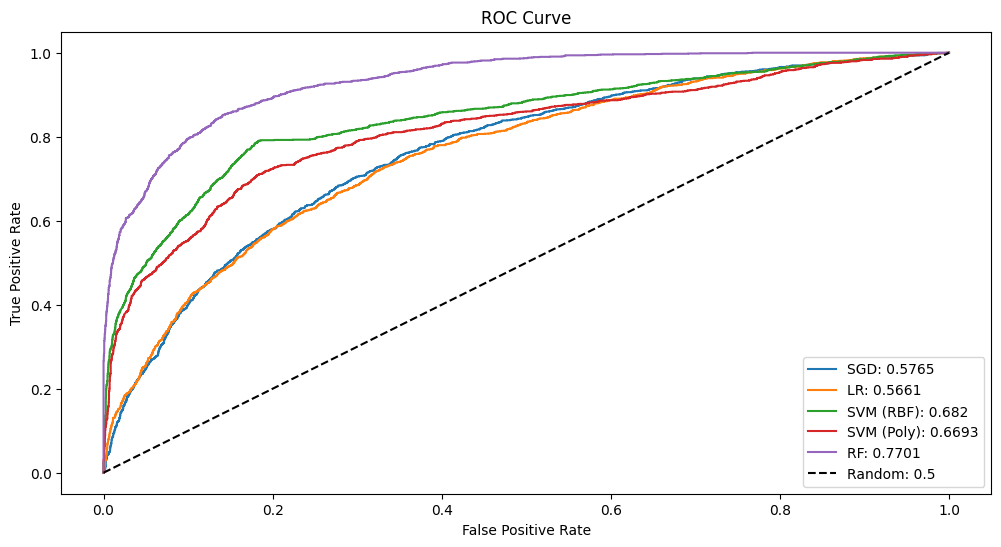

In [ ]:
plt.figure(figsize = (12,6), linewidth = 2)

plt.plot(false_sgd, true_sgd, label = 'SGD: ' + str(round(roc_sgd, 4)))
plt.plot(false_lr, true_lr, label = 'LR: ' + str(round(roc_lr, 4)))
plt.plot(false_svm_rbf, true_svm_rbf, label = 'SVM (RBF): ' + str(round(roc_svm_rbf, 4)))
plt.plot(false_svm_poly, true_svm_poly, label = 'SVM (Poly): ' + str(round(roc_svm_poly, 4)))
plt.plot(false_rf, true_rf, label = 'RF: ' + str(round(roc_rf, 4)))
##plt.plot(false_xgb, true_xgb, label = 'XGB: ' + str(round(roc_xgb, 4)))

plt.plot([0, 1], [0, 1], 'k--', label = 'Random: 0.5')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()

### __<font color='green'>Observation</font>__

From the above graph, we can clearly see that the __Random Forest (RF) classifier has the highest ROC score (0.7733)__ and hence covers the highest area under curve as well. From this, we finally choose the Random Forest classifier with its optimal parameters as our final machine learning classifier model. Let us now try to use this model with our test data and see how it works out.



# __8. Machine Learning classifiers (Test Accuracy)__

Now that we have the classifier we want to use (Random Forest classifier)

In [ ]:
data_test = data_test[['Exited'] + continuous_vars + categorical_vars]

# Change the 0 in categorical variables to -1

data_test.loc[data_test.HasCrCard == 0, 'HasCrCard'] = -1
data_test.loc[data_test.IsActiveMember == 0, 'IsActiveMember'] = -1

# One hot encode the categorical variables

var_list = ['Geography', 'Gender']

for var in var_list:
  for val in data_test[var].unique():
    data_test[var + '_' + val] = np.where(data_test[var] == val, 1, -1)

data_test = data_test.drop(var_list, axis=1)

# Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data

columns_list = list(set(data_train.columns) - set(data_test.columns))

for column in columns_list:
    data_test[str(column)] = -1

# MinMax scaling of the continuous variables based on min and max from the train data

data_test[continuous_vars] = (data_test[continuous_vars] - min_values) / (max_values - min_values)

# Ensure that The variables are ordered in the same way as was ordered in the train set

data_test = data_test[data_train.columns]

In [ ]:
# mask infinite values and delete not available or missing values from columns

data_test = data_test.mask(np.isinf(data_test))
data_test = data_test.dropna()

print(data_test.shape)

(2000, 14)


In [ ]:
# classification report for the test data

print(classification_report(data_test.Exited,  rf_model.predict(data_test.loc[:, data_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1581
           1       0.79      0.48      0.60       419

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
# calculate the ROC score, false positives, and true positives

roc_rf_test, false_rf_test, true_rf_test = get_roc(data_test.Exited,
                                                   rf_model.predict(data_test.loc[:, data_test.columns != 'Exited']),
                                                   rf_model.predict_proba(data_test.loc[:, data_test.columns != 'Exited'])[:,1])

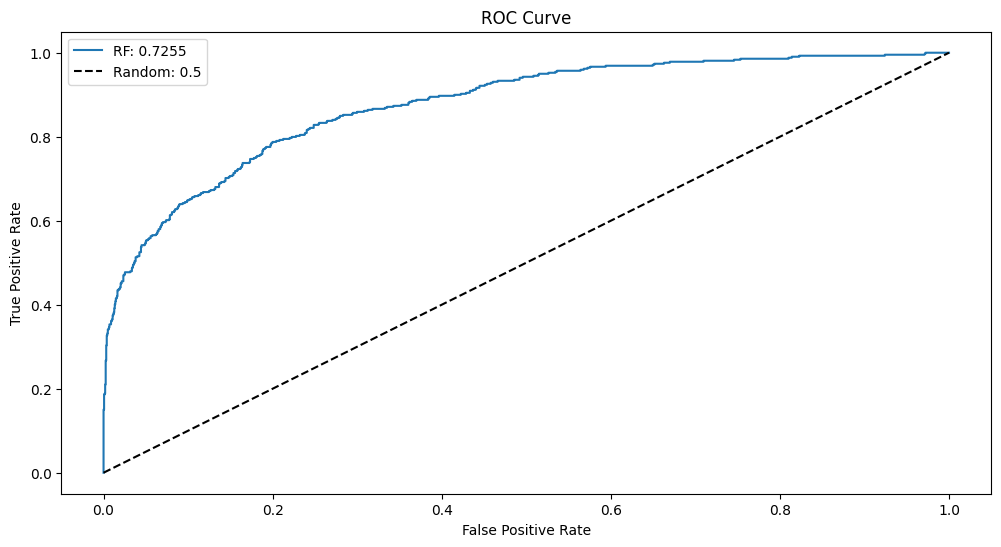

In [ ]:
plt.figure(figsize = (12,6), linewidth = 2)

plt.plot(false_rf_test,
         true_rf_test,
         label = 'RF: ' + str(round(roc_rf_test, 4)))

plt.plot([0, 1], [0, 1], 'k--', label = 'Random: 0.5')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()

# __9. Neural Network classifier (preparation)__


In [ ]:
!pip install matplotlib-venn

In [ ]:
# import necessary neural network libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# libraries for data processing and train-test data spliting

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# libraries for metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
df_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# setting up the features variable X and target variable y

X = df_data.drop(['Exited'], axis = 1)
y = df_data['Exited']

In [ ]:
X.head(10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [ ]:
y.head(10)

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

Here we turn the categorical variables __Geography__ and __ Gender__ into one-hot encoding vectors.

In [ ]:
# one-hot encoding of categorical variables

labelEncoder = LabelEncoder()

X['Geography'] = labelEncoder.fit_transform(X['Geography'])
X['Gender'] = labelEncoder.fit_transform(X['Gender'])

X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
5,645,2,1,44,8,113755.78,2,1,0,149756.71
6,822,0,1,50,7,0.00,2,1,1,10062.80
7,376,1,0,29,4,115046.74,4,1,0,119346.88
8,501,0,1,44,4,142051.07,2,0,1,74940.50
9,684,0,1,27,2,134603.88,1,1,1,71725.73


In [ ]:
# train-test split of the data (80 % - 20 % split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = y)

# scale the values of the data variables
# for easier computations

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('X train shape:\t', X_train.shape)
print('y train shape:\t', y_train.shape)
print('X test shape:\t', X_test.shape)
print('y test shape:\t', y_test.shape)

X train shape:	 (8000, 10)
y train shape:	 (8000,)
X test shape:	 (2000, 10)
y test shape:	 (2000,)


# __10. Neural Network classifier (1 Hidden layer - without Early Stopping)__

Here we try to model a neural network classifier without early stopping criterion.

The settings we use are:

* __Hidden layers:__ 1
* __Number of neurons:__ 500
* __Hidden layer activation:__ ReLU
* __Final activation:__ Sigmoid
* __Optimizer:__ ADAM
* __Loss:__ Binary Cross-entropy
* __Epochs:__ 500

In [ ]:
# setting up the neural network model

nn_model = Sequential()

nn_model.add(Dense(500, activation = 'relu', input_dim = X.shape[1]))
nn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# setting up the optimizer, loss, and metrics for the model

nn_model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting the neural model to the training data

history = nn_model.fit(X_train, y_train, validation_data = (X_test, y_test),
                       epochs=100, verbose=1)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.4262 - accuracy: 0.8191 - val_loss: 0.3891 - val_accuracy: 0.8415
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3714 - accuracy: 0.8486 - val_loss: 0.3633 - val_accuracy: 0.8535
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.8543 - val_loss: 0.3581 - val_accuracy: 0.8520
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3505 - accuracy: 0.8556 - val_loss: 0.3590 - val_accuracy: 0.8535
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3488 - accuracy: 0.8577 - val_loss: 0.3577 - val_accuracy: 0.8515
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3459 - accuracy: 0.8580 - val_loss: 0.3505 - val_accuracy: 0.8530
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3445 - accuracy: 0.8601 - val_loss: 0.3525 - val_accuracy: 0.8570

In [ ]:
# Evaluating the model's performance on the train data and test data

_, train_acc = nn_model.evaluate(X_train, y_train, verbose=1)
_, test_acc = nn_model.evaluate(X_test, y_test, verbose=1)

print()

# print the train accuracy and test accuracy

print('Train accuracy: %.3f %%' % (train_acc * 100))
print('Test accuracy:\t%.3f %%' % (test_acc * 100))

63/63 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8420

Train accuracy: 89.925 %
Test accuracy:	84.200 %


In [ ]:
# predict the test values to get the confusion matrix

# Threshold probabilities to get binary class labels
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(conf_matrix)

[[1464  129]
 [ 187  220]]


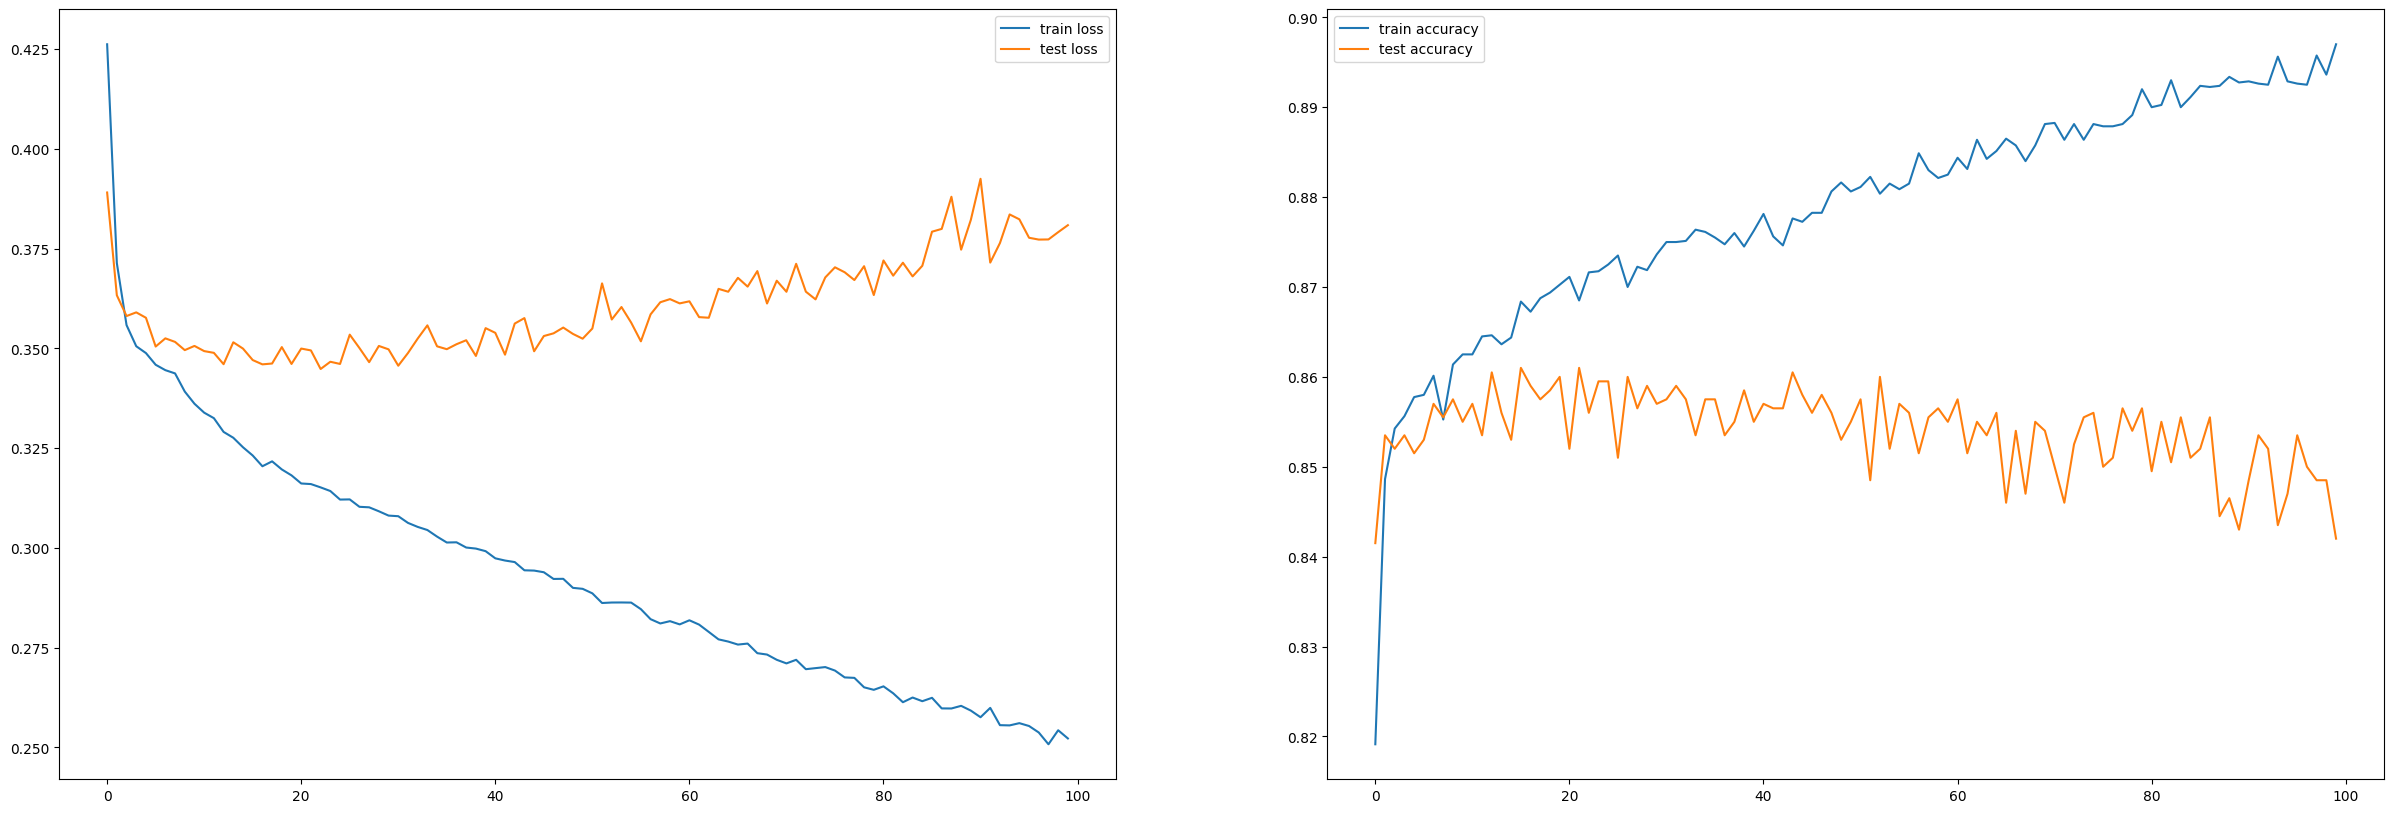

In [ ]:
# plot the accuracy and loss graphs for train and test data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='test loss')

ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

# __11. Neural Network classifier (1 Hidden layer - with Early Stopping)__

Let's model a neural network classifier without early stopping criterion.

The settings we use are:

* __Hidden layers:__ 1
* __Number of neurons:__ 500
* __Hidden layer activation:__ ReLU
* __Final activation:__ Sigmoid
* __Optimizer:__ ADAM
* __Loss:__ Binary Cross-entropy
* __Epochs:__ 500
* __Early stopping:__ On validation loss

In [ ]:
# setting up the neural network model

nn_model_es = Sequential()

nn_model_es.add(Dense(500, activation = 'relu', input_dim = X.shape[1]))
nn_model_es.add(Dense(1, activation='sigmoid'))

In [ ]:
# setting up the optimizer, loss, and metrics for the model

nn_model_es.compile(optimizer = 'adam',
                    loss = 'binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
# setting up the Early Stopping criterion on validation loss

earlyStopping = EarlyStopping(monitor='val_loss',
                              mode='min',
                              verbose=1)

In [ ]:
# fitting the neural model to the training data

history = nn_model_es.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs=500, verbose=1, callbacks=[earlyStopping])

Epoch 1/500
250/250 [==============================] - 2s 4ms/step - loss: 0.4277 - accuracy: 0.8189 - val_loss: 0.3878 - val_accuracy: 0.8340
Epoch 2/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3706 - accuracy: 0.8500 - val_loss: 0.3599 - val_accuracy: 0.8535
Epoch 3/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3574 - accuracy: 0.8553 - val_loss: 0.3608 - val_accuracy: 0.8530
Epoch 3: early stopping


In [ ]:
# Evaluating the model's performance on the train data and test data

_, train_acc = nn_model.evaluate(X_train, y_train, verbose=1)
_, test_acc = nn_model.evaluate(X_test, y_test, verbose=1)

print()

# print the train accuracy and test accuracy

print('Train accuracy: %.3f %%' % (train_acc * 100))
print('Test accuracy:\t%.3f %%' % (test_acc * 100))

63/63 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8420

Train accuracy: 89.925 %
Test accuracy:	84.200 %


In [ ]:
# predict the test values to get the confusion matrix

# Convert probabilities to binary predictions using threshold
threshold = 0.5
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(conf_matrix)

[[1464  129]
 [ 187  220]]


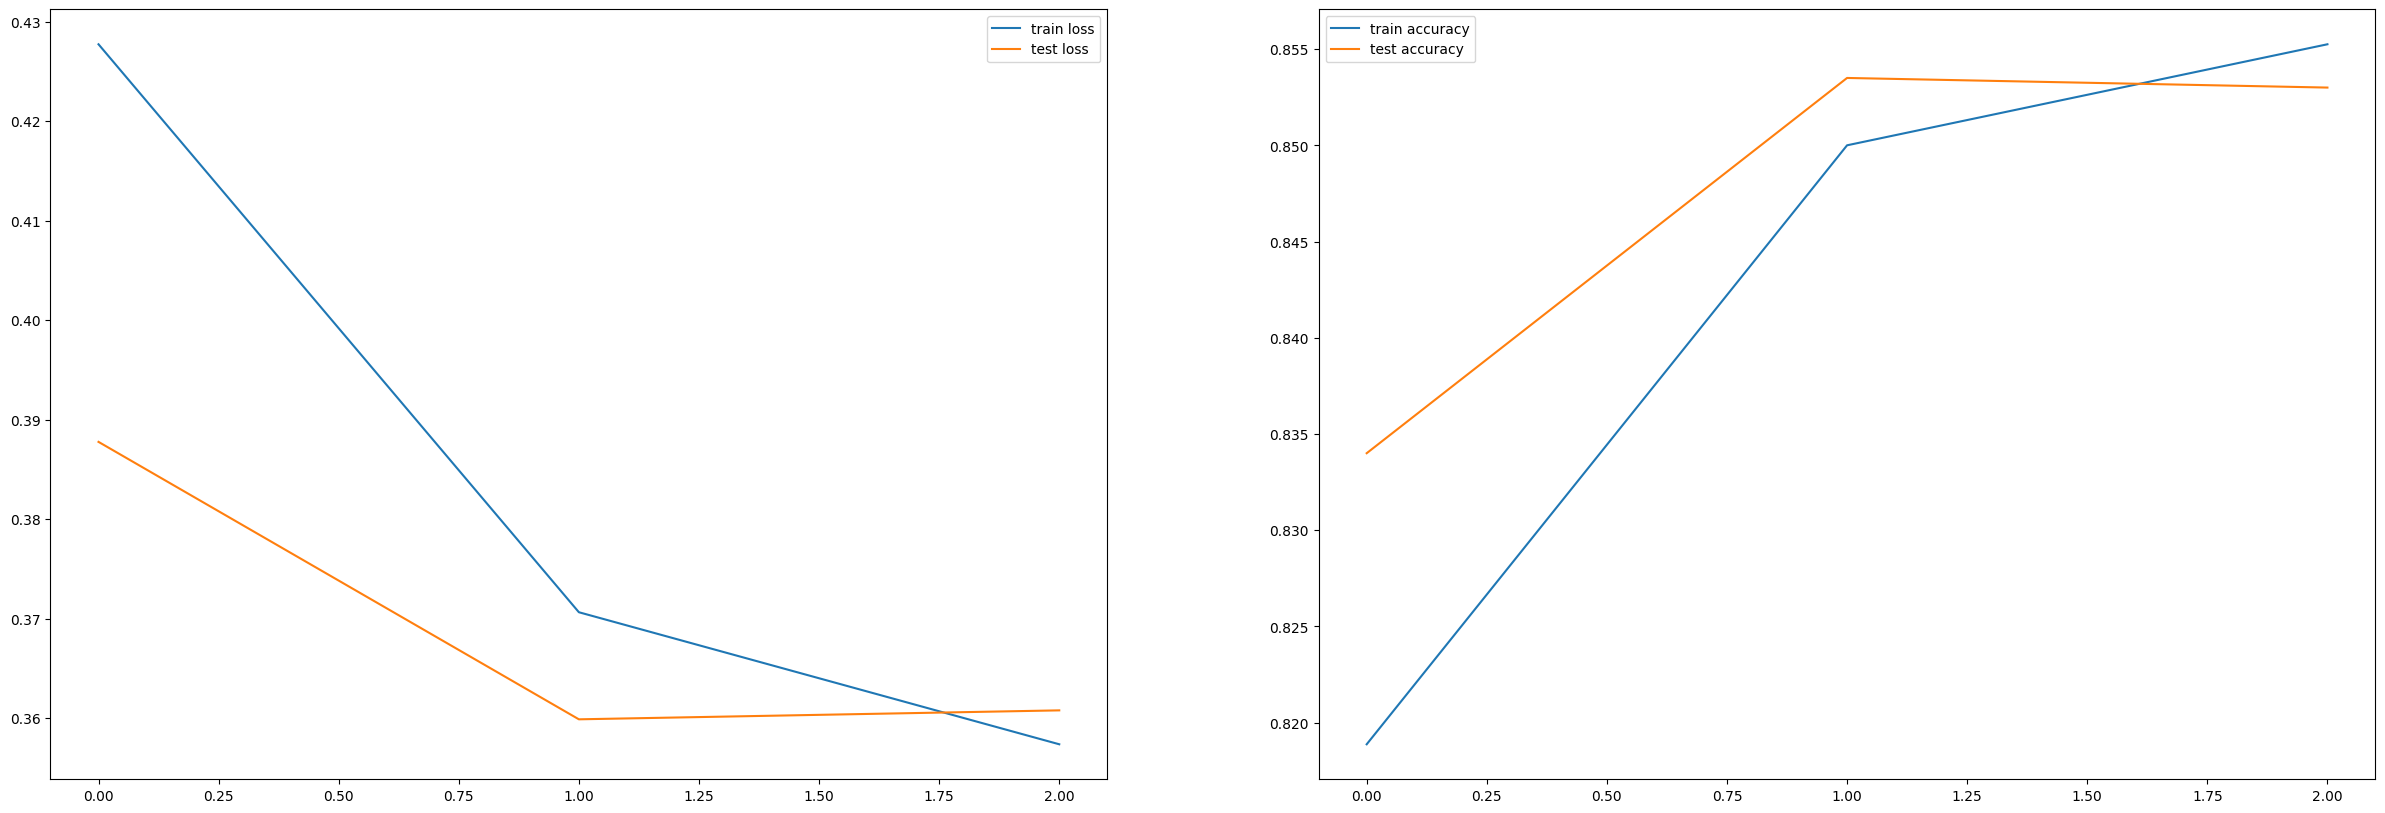

In [ ]:
# plot the accuracy and loss graphs for train and test data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='test loss')

ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

# __12. Neural Network classifier (5 Hidden layers - without Early Stopping)__

Here we try to model a neural network classifier without early stopping criterion.

The settings we use are:

* __Hidden layers:__ 5
* __Hidden layer activation:__ LeakyReLU
* __Final activation:__ Sigmoid
* __Optimizer:__ ADAM
* __Loss:__ Binary Cross-entropy
* __Epochs:__ 100

In [ ]:
X = df_data.iloc[:, 1:11].values
y = df_data['Exited'].values

# removing unnecessary columns
dataset = df_data


In [ ]:
df_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

x = dataset.apply(LabelEncoder().fit_transform)

# one-hot encoding

OneHotEncode = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(OneHotEncode.fit_transform(x[['Geography']]).toarray())

x = x.join(enc_df)
x = x.drop(['Geography', 'Exited'], axis=1)
x = x.rename(columns={0: 'France', 1:'Spain', 2:'Germany'})
z = x
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Spain,Germany
0,228,0,24,2,0,0,1,1,5068,1.0,0.0,0.0
1,217,0,23,1,743,0,0,1,5639,0.0,0.0,1.0
2,111,0,24,8,5793,2,1,0,5707,1.0,0.0,0.0
3,308,0,21,1,0,1,0,0,4704,1.0,0.0,0.0
4,459,0,25,2,3696,0,1,1,3925,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

# train-test data split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler

# scaling the data

X_train = StandardScaler().fit_transform(X_train)
X_test  = StandardScaler().fit_transform(X_test)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
import keras
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dropout, Dense, LeakyReLU
##from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
##from tensorflow.keras.constraints import max_norm
from keras.constraints import max_norm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler



from keras import initializers

# define network as a method
def create_model():

    initializer = 'glorot_normal'

    # create model
    model = Sequential()
    model.add(Dense( input_dim = 12, units = 21, kernel_initializer = initializer))
    model.add(LeakyReLU(alpha = 0.25))
    model.add(Dropout(rate = 0.2))

    # Adding the 2nd layer
    model.add(Dense( units = 21, kernel_initializer = initializer))
    model.add(LeakyReLU(alpha = 0.25))
    model.add(Dropout(rate = 0.2))

    # Adding the 3rd layer
    model.add(Dense( units = 21, kernel_initializer = initializer))
    model.add(LeakyReLU(alpha = 0.25))
    model.add(Dropout(rate = 0.2))

    # Adding the fourth hidden layer
    model.add(Dense( units = 21, kernel_initializer = initializer))
    model.add(LeakyReLU(alpha = 0.25))
    model.add(Dropout(rate = 0.2))

    # Adding the fifth hidden layer
    model.add(Dense( units = 21, kernel_initializer = initializer))
    model.add(LeakyReLU(alpha = 0.25))

    # Adding the output layer
    model.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer = 'uniform')) # uniform

    # Compile model
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

# fitting the model

model = create_model()
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                       batch_size = 16, epochs=100, verbose=1)

Epoch 1/100
500/500 [==============================] - 8s 8ms/step - loss: 0.4825 - accuracy: 0.7968 - val_loss: 0.4273 - val_accuracy: 0.8045
Epoch 2/100
500/500 [==============================] - 2s 4ms/step - loss: 0.4399 - accuracy: 0.8064 - val_loss: 0.4185 - val_accuracy: 0.8220
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4342 - accuracy: 0.8100 - val_loss: 0.4094 - val_accuracy: 0.8275
Epoch 4/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4212 - accuracy: 0.8196 - val_loss: 0.3968 - val_accuracy: 0.8450
Epoch 5/100
500/500 [==============================] - 1s 3ms/step - loss: 0.4173 - accuracy: 0.8232 - val_loss: 0.3889 - val_accuracy: 0.8455
Epoch 6/100
500/500 [==============================] - 1s 3ms/step - loss: 0.4131 - accuracy: 0.8239 - val_loss: 0.3829 - val_accuracy: 0.8555
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4054 - accuracy: 0.8328 - val_loss: 0.3640 - val_accuracy: 0.8605

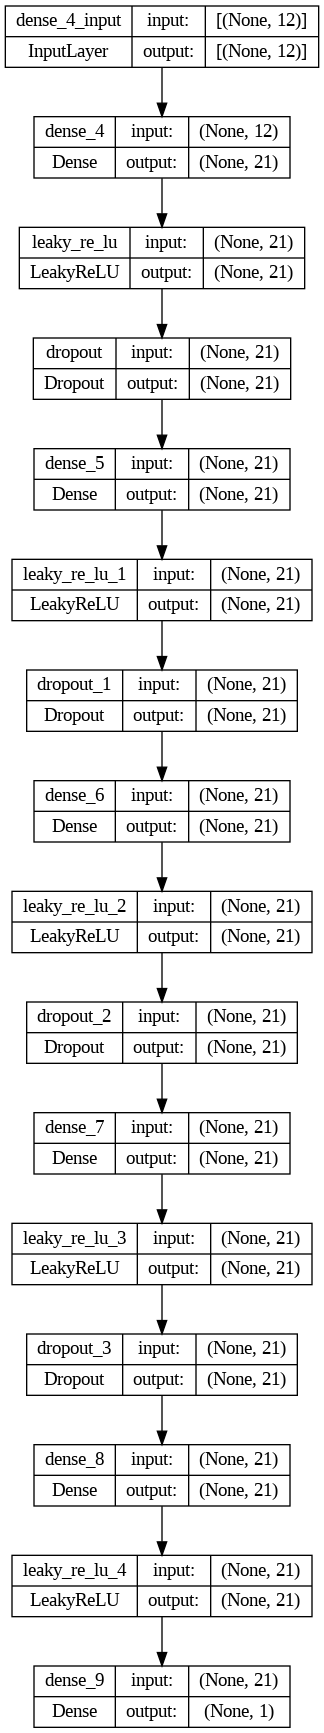

In [ ]:
# show network structure
keras.utils.plot_model(model, "network.png", show_shapes=True)

In [ ]:
# Evaluating the model's performance on the train data and test data

_, train_acc = model.evaluate(X_train, y_train, verbose=1)
_, test_acc = model.evaluate(X_test, y_test, verbose=1)

print()

# print the train accuracy and test accuracy

print('Train accuracy: %.3f %%' % (train_acc * 100))
print('Test accuracy:\t%.3f %%' % (test_acc * 100))

63/63 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8645

Train accuracy: 86.563 %
Test accuracy:	86.450 %


In [ ]:
# predict the test values to get the confusion matrix

# Convert probabilities to binary predictions using threshold
threshold = 0.5
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(conf_matrix)

[[1520   75]
 [ 196  209]]


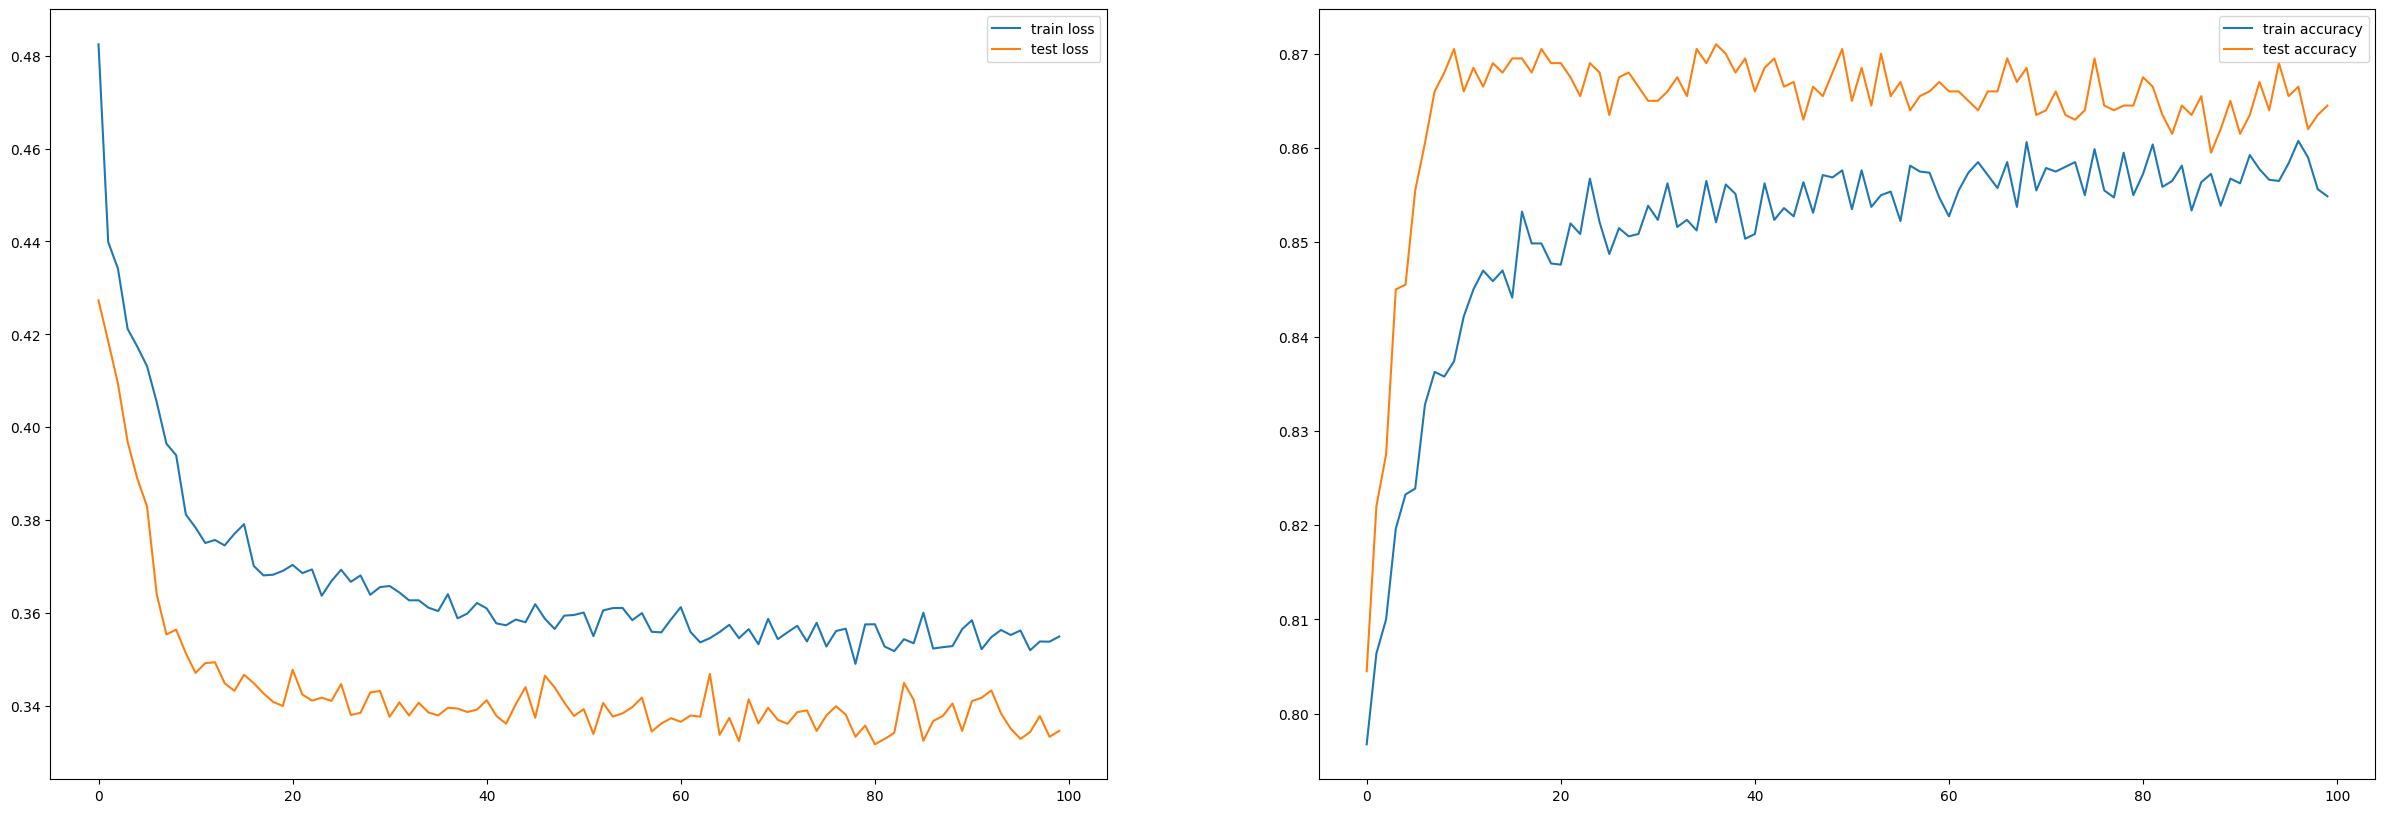

In [ ]:
# plot the accuracy and loss graphs for train and test data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='test loss')

ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

# __13. Neural Network classifier (5 Hidden layers - with Early Stopping)__

Here we try to model a neural network classifier without early stopping criterion.

The settings we use are:

* __Hidden layers:__ 5
* __Hidden layer activation:__ LeakyReLU
* __Final activation:__ Sigmoid
* __Optimizer:__ ADAM
* __Loss:__ Binary Cross-entropy
* __Epochs:__ 100

In [ ]:
# setting up the Early Stopping criterion on validation loss

earlyStopping = EarlyStopping(monitor='val_loss',
                              mode='min',
                              verbose=1)

In [ ]:
# fitting the model

model = create_model()
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                    batch_size = 16, epochs=100, verbose=1,
                    callbacks=[earlyStopping])

Epoch 1/100
500/500 [==============================] - 4s 4ms/step - loss: 0.4884 - accuracy: 0.7930 - val_loss: 0.4391 - val_accuracy: 0.8030
Epoch 2/100
500/500 [==============================] - 1s 3ms/step - loss: 0.4472 - accuracy: 0.8045 - val_loss: 0.4232 - val_accuracy: 0.8195
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4360 - accuracy: 0.8149 - val_loss: 0.4150 - val_accuracy: 0.8325
Epoch 4/100
500/500 [==============================] - 1s 3ms/step - loss: 0.4287 - accuracy: 0.8198 - val_loss: 0.4075 - val_accuracy: 0.8425
Epoch 5/100
500/500 [==============================] - 1s 3ms/step - loss: 0.4233 - accuracy: 0.8239 - val_loss: 0.4067 - val_accuracy: 0.8390
Epoch 6/100
500/500 [==============================] - 2s 4ms/step - loss: 0.4243 - accuracy: 0.8236 - val_loss: 0.4022 - val_accuracy: 0.8430
Epoch 7/100
500/500 [==============================] - 1s 3ms/step - loss: 0.4193 - accuracy: 0.8264 - val_loss: 0.4010 - val_accuracy: 0.8400

In [ ]:
# evaluating the model's performance on the train data and test data

_, train_acc = model.evaluate(X_train, y_train, verbose=1)
_, test_acc = model.evaluate(X_test, y_test, verbose=1)

print()

# print the train accuracy and test accuracy

print('Train accuracy: %.3f %%' % (train_acc * 100))
print('Test accuracy:\t%.3f %%' % (test_acc * 100))

63/63 [==============================] - 1s 6ms/step - loss: 0.3987 - accuracy: 0.8430

Train accuracy: 83.550 %
Test accuracy:	84.300 %


In [ ]:
# predict the test values to get the confusion matrix
# Convert probabilities to binary predictions using threshold
threshold = 0.7
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(conf_matrix)

[[1584   11]
 [ 263  142]]


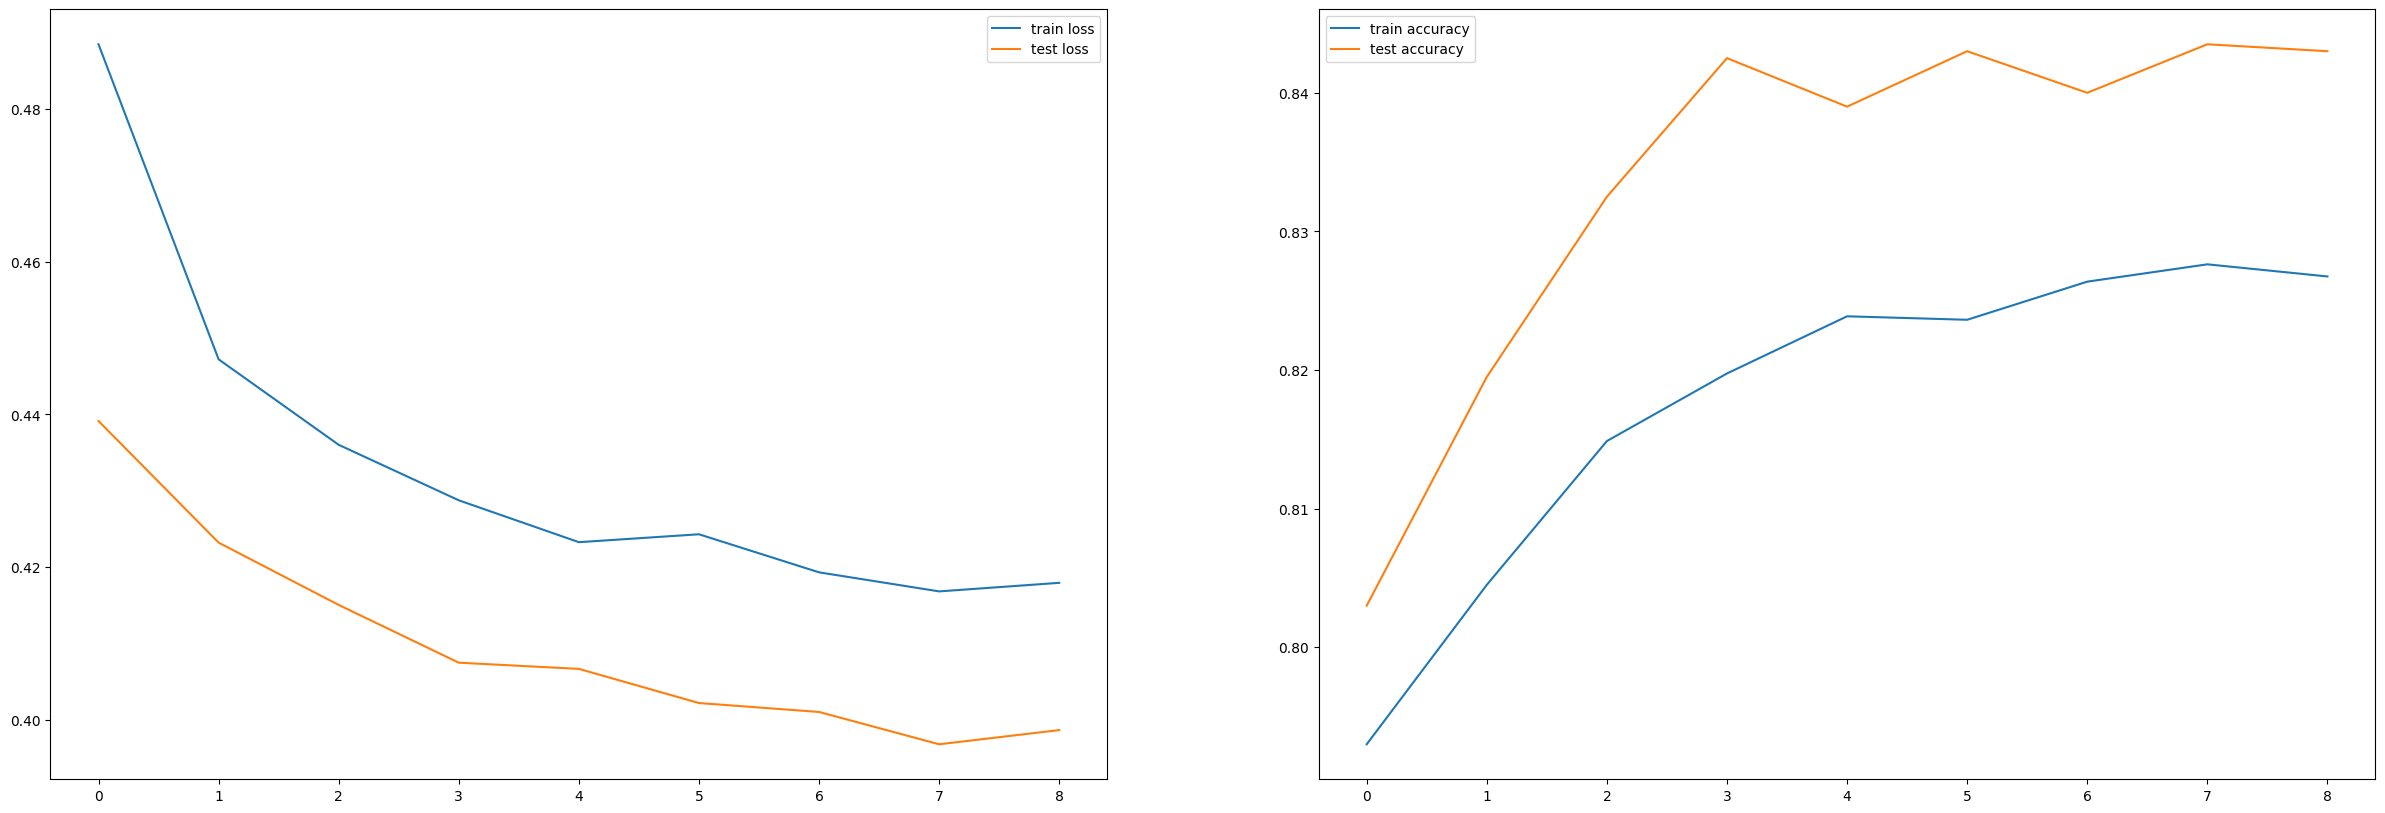

In [ ]:
# plot the accuracy and loss graphs for train and test data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='test loss')

ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

Here, we have trained four neural network models; two without early stopping and the other two with a simple early stopping criterion. The summary of the training and testing accuracy scores are given in the table below:


|Model|# Hidden layers|Early Stopping|Epochs|Train Acc. %|Test Acc. %|
|----|----|----|----|----|----|
|1|1|No|50|__89.662__|84.100|
|2|1|Yes|5|85.975|85.650|
|3|5|No|100|86.750|86.550|
|4|5|Yes|10|85.350|__86.650__|

### __Neural Model 1: 1 hidden layer (without Early Stopping)__

What we see here is that the first model gives a higher training accuracy of __89.662 %__ most likely because this models overfits to the training data. It also gives a lower test accuracy due to this reason.

### __Neural Model 2: 1 hidden layer (with Early Stopping)__

The second model is the exact same neural network again but this time with an early stopping criterion. We see that the model now stops at epoch number 5. Here we see that the training accuracy is much lower at 85.975 % because it could not overfit to the data. However, we get a better test accuracy of __85.650 %__ in this case.

### __Neural Model 3: 5 hidden layers (without Early Stopping)__

Then we try to use multiple (5) fully-connected hidden layers with the __LeakyReLU__ activation function. The third model uses these settings to train for 100 epochs without any early stopping criterion. We see that we get a slightly higher test accuracy __(86.55 %)__. This is probably because there are more hidden layers with better activation functions involved.

### __Neural Model 4: 5 hidden layers (with Early Stopping)__

In this last neural model, we use the same settings as the third model, but with a simple early stopping criterion. Luckily, we see that the model stops after 10 epochs only, but again gives a slightly better test accuracy __(86.65 %)__ than before. As seen before, we again see that the training accuracy is much higher for models without early stopping, which is most likely caused by overfitting.


*

